# Algorithme de regularisation TV

In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex
from Codes.algoviolet import violetBD
# iteration FBstep
from Codes.fbstep import FBS_im
from Codes.fbstep import FBS_dual
from Codes.fbstep import Energy

In [2]:
# Data

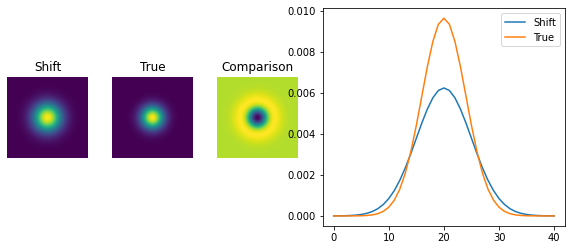

Erreur |Shift - True|/ |True| : 0.2811 


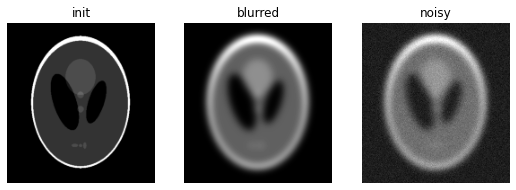

Erreur blurred |x_blurr- x_true|_2 :0.5683
Erreur |x_noisy - x_true|_2 :0.5733


In [3]:
K1, _, x_im, x_b, x_o1 = DataGen()

In [4]:
# Algo
#
niter_TV = 300
Ep       = np.zeros(2*niter_TV)
Ed       = np.zeros(2*niter_TV)
x_in     = x_o1.copy()
mu       = 0.005
# Matrix sizes
Nx, Ny   = x_in.shape # image size
# initialisation
xi       = x_in.copy()
xi       = x_in.copy() # image
xbar     = x_in.copy() # image
xold     = x_in.copy() # image saved for relaxation
px       = np.zeros((Nx,Ny)) 
py       = np.zeros((Nx,Ny))

In [5]:
### padding K
M = 20
K = np.pad(K1, ((Nx//2-M,Nx//2-M),(Ny//2-M,Ny//2-M)),'constant')

In [6]:
# count = 0
# for n in range(niter_TV):
#     # one FBS for dual variable
#     px,py = FBS_dual(xbar,px,py,mu)
#     # energy
#     Ep[count],Ed[count] = Energy(xi,K,px,py,x_in,np.zeros((Nx,Ny)),0,mu)
#     count        +=1
#     # one FBS for image
#     xi            = FBS_im(xi,K,px,py,x_in,mu)
#     # energy
#     Ep1,Ed[count] = Energy(xi,K,px,py,x_in,np.zeros((Nx,Ny)),0,mu)
#     Ep[count] = Ep1
#     count        +=1
#     # relaxation
#     xbar          = 2*xi-xold
#     xold          = xi.copy()
# Display_im(xi,x_im)
# plt.plot(Ep)

### REAL GAME

In [13]:
alpha     = 500
mu        = 0.005
K_in      = K1.copy()
x_in      = np.zeros(x_im.shape)
K_out,x_out,Ep23,Ed23 = violetBD(x_in,K_in,x_o1,\
                            alpha,mu,coeffK=0.0,coeffx=1,\
                            niter=1500,\
                            proj_simplex=True,verbose=False)

Final energy : 6.60322660819802


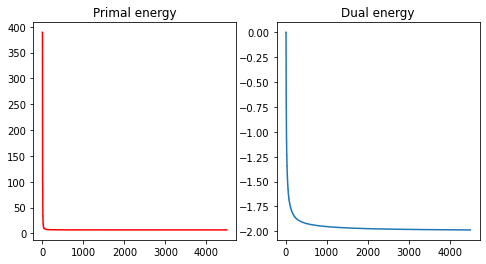

In [11]:
Display_epd(Ep23,Ed23)

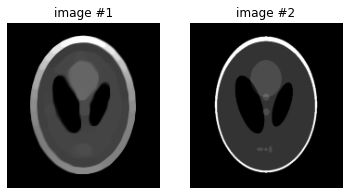

Erreur |im1 - im2|/|im2| :0.4821


In [12]:
Display_im(x_out,x_im)